### Regressão linear Aplicação prática em Python

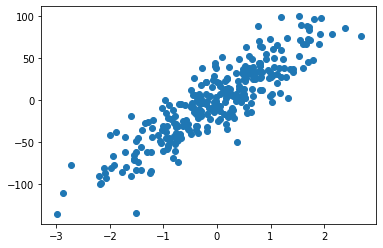

In [2]:
# importações modulos
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# gerando massa de dados:
x, y = make_regression(n_samples=300,  # quantidade de amostras
                       n_features=1,   # quantidade de variaveis
                       noise=20)       # ruido nos dados

# visualizando dados graficamente
plt.scatter(x, y)
plt.show()

In [3]:
# importação modelo regressão linear
from sklearn.linear_model import LinearRegression

# criação o modelo
model_linear_regression =  LinearRegression()

In [4]:
# treinamento do modelo com os dados criados
model_linear_regression.fit(x, y)

LinearRegression()

In [5]:
# coeficiente linear
model_linear_regression.intercept_

-0.2738793421332202

In [6]:
# coficiente angular
model_linear_regression.coef_

array([39.21601521])

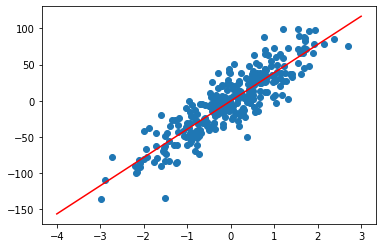

In [7]:
# visualizando o resultada
import numpy as np

plt.scatter(x, y)

xreg = np.arange(-4, 4, 1)                          # range de valores

# grafico de regressão
plt.plot(xreg,                                      # range de valores
         38.98037462 * xreg - 0.32327337523847577,  # função regressão linear
         color= 'red')                              # cor da reta no grafico

plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# dividindo aleatóriamente os dados para teino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
                                                        test_size=0.30) # % dos dados para uso do teste

In [9]:
# tamanho dos dados
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((210, 1), (90, 1), (210,), (90,))

In [10]:
model_linear_regression.fit(x_treino, y_treino)

LinearRegression()

In [11]:
# avaliaão da precisão do modelo
resultado= model_linear_regression.score(x_teste, y_teste)

In [12]:
# coeficiente de determinação R^2
print(resultado)

0.7738136392928228


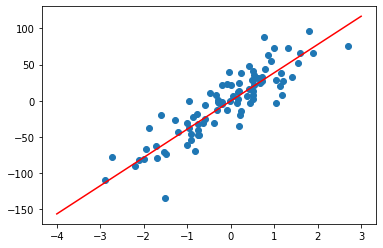

In [13]:
# visualização do modelo teinado
plt.scatter(x_teste, y_teste)
xreg = np.arange(-4, 4, 1)                          # range de valores

# grafico de regressão
plt.plot(xreg,                                      # range de valores
         38.98037462 * xreg - 0.32327337523847577,  # função regressão linear
         color= 'red')                              # cor da reta no grafico

plt.show()

Link dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

In [14]:
# modulo para manipulação de dados
import pandas as pd

# importando dados para uma variavel
houses= pd.read_csv('.\datasets\kc_house_data.csv')

In [15]:
# visualização dos primeiros registros
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
# importações para manipulação dos dados e construção do modelo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# configurações do pandas para visualização
pd.set_option('display.max_columns', 21)     # dataset com 21 colunas

In [17]:
# visualização dos primeiros registros
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# retirando colunas irrelevantes
houses.drop('id',              # nome coluna  
            axis= 1,           # eixo 
            inplace= True)     # retirar completamente dos dados
houses.drop('date',
            axis= 1,
            inplace= True)
houses.drop('zipcode',
            axis= 1,
            inplace= True)
houses.drop('lat',
            axis= 1,
            inplace= True)
houses.drop('long',
            axis= 1,
            inplace= True)

In [19]:
# visualização após modificações
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [20]:
# definiçao variaveis preditoras e variaveis target
y= houses['price']                  # target
x= houses.drop('price', axis= 1)    # restante dos dados sem a coluna target

In [21]:
# separação dos dados de treino e teste, 30% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3)

In [22]:
# visualização dos tamanhos após a separação
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((15129, 15), (6484, 15), (15129,), (6484,))

In [23]:
# criando o modelo
model_linear_regression = LinearRegression()

# treinando o modelo
model_linear_regression.fit(x_treino, y_treino)

LinearRegression()

In [24]:
# calculando o coeficiente r^2 com os dados de teste
resultado = model_linear_regression.score(x_teste, y_teste)

In [25]:
print(resultado)

0.6502608874360625


### FIM.